# Program -10 : Logistic Regression line along with SSE, MSE, MAE errors using model.coef_ and model.intercept_ parameters. For plotting, first sort the points in X_test and then plot between X_test and y_predict.

Model Coefficient: 2.2379
Model Intercept: -11.0910
SSE: 0.3189
MSE: 0.0106
MAE: 0.0500


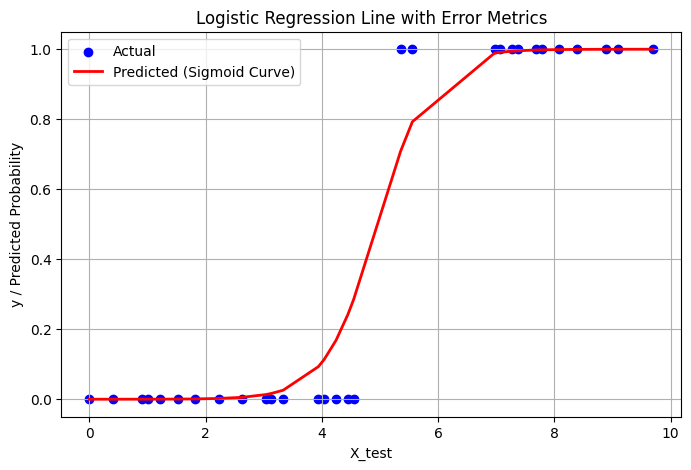

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = (X.flatten() > 5).astype(int)  # Binary classes (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

coef = model.coef_[0][0]
intercept = model.intercept_[0]


SSE = np.sum((y_test - y_pred_prob) ** 2)
MSE = mean_squared_error(y_test, y_pred_prob)
MAE = mean_absolute_error(y_test, y_pred_prob)

print(f"Model Coefficient: {coef:.4f}")
print(f"Model Intercept: {intercept:.4f}")
print(f"SSE: {SSE:.4f}")
print(f"MSE: {MSE:.4f}")
print(f"MAE: {MAE:.4f}")

# Sort X_test for smooth plotting
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]
y_pred_prob_sorted = y_pred_prob[sorted_indices]

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_prob_sorted, color='red', label='Predicted (Sigmoid Curve)', linewidth=2)
plt.xlabel('X_test')
plt.ylabel('y / Predicted Probability')
plt.title('Logistic Regression Line with Error Metrics')
plt.legend()
plt.grid(True)
plt.show()
